In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
corona = pd.read_csv("Corona_tested.csv")

C:\Users\satya\AppData\Local\Temp\ipykernel_22764\3162336676.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  corona = pd.read_csv("Corona_tested.csv")


In [3]:
corona.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,negative,None,None,Abroad
1,2,11-03-2020,0,1,0,0,0,positive,None,None,Abroad
2,3,11-03-2020,0,1,0,0,0,positive,None,None,Abroad
3,4,11-03-2020,1,0,0,0,0,negative,None,None,Abroad
4,5,11-03-2020,1,0,0,0,0,negative,None,None,Contact with confirmed


In [4]:
corona.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [5]:
corona = corona.replace(r'^\s*$', np.nan, regex=True)

In [6]:
from datetime import datetime

date_string = "2020-03-11"
date_object = datetime.strptime(date_string, "%Y-%m-%d")


In [7]:
date_object.day
date_object.month
date_object.year

2020

In [8]:
corona.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,negative,None,None,Abroad
1,2,11-03-2020,0,1,0,0,0,positive,None,None,Abroad
2,3,11-03-2020,0,1,0,0,0,positive,None,None,Abroad
3,4,11-03-2020,1,0,0,0,0,negative,None,None,Abroad
4,5,11-03-2020,1,0,0,0,0,negative,None,None,Contact with confirmed


In [9]:
corona.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [10]:
# Check for missing values
print(corona.isnull().sum())


Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64


              Ind_ID
count  278848.000000
mean   139424.500000
std     80496.628269
min         1.000000
25%     69712.750000
50%    139424.500000
75%    209136.250000
max    278848.000000


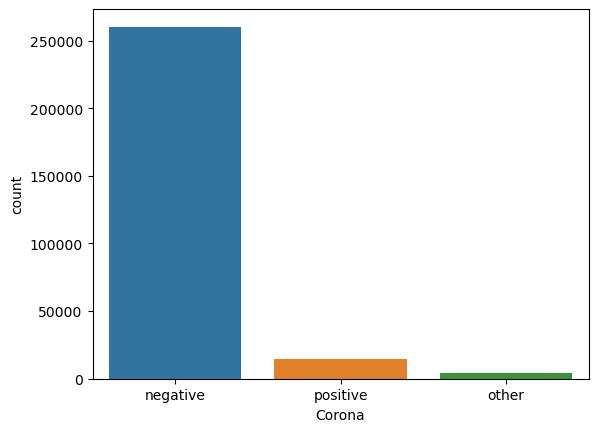

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(corona.describe())

# Visualizations
sns.countplot(x='Corona', data=corona)
plt.show()
# Continue with other visualizations as needed

In [12]:
# Create dummy variables for categorical features
corona = pd.get_dummies(corona, columns=['Sex', 'Known_contact'], drop_first=True)

# Modelling and Anlysis

# Decision tree

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv("corona_tested.csv")

# Drop non-numeric columns (for simplicity in this example)
X = df.drop(['Corona','Sex', 'Known_contact'], axis=1)
y = df['Corona']

# Convert categorical variables to numerical (you may need more advanced preprocessing)
X = pd.get_dummies(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Make predictions
y_pred = model_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\satya\AppData\Local\Temp\ipykernel_22764\831732378.py:7: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("corona_tested.csv")


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.96      0.96     52041
       other       0.25      0.24      0.25       791
    positive       0.46      0.45      0.45      2938

    accuracy                           0.92     55770
   macro avg       0.56      0.55      0.55     55770
weighted avg       0.92      0.92      0.92     55770



# Random Forest

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv("Corona_tested.csv")

# Assuming 'Corona' is the target variable
X = df.drop(['Corona','Sex','Known_contact'], axis=1)
y = df['Corona']

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\satya\AppData\Local\Temp\ipykernel_22764\1658392658.py:7: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Corona_tested.csv")


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.96      0.96     52041
       other       0.25      0.24      0.25       791
    positive       0.46      0.45      0.46      2938

    accuracy                           0.92     55770
   macro avg       0.56      0.55      0.55     55770
weighted avg       0.92      0.92      0.92     55770



# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [16]:
import duckdb
conn=duckdb.connect()

In [17]:
conn.register("df",df)

In [18]:
conn.execute("select * from df").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,negative,None,None,Abroad
1,2,11-03-2020,0,1,0,0,0,positive,None,None,Abroad
2,3,11-03-2020,0,1,0,0,0,positive,None,None,Abroad
3,4,11-03-2020,1,0,0,0,0,negative,None,None,Abroad
4,5,11-03-2020,1,0,0,0,0,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,0,0,0,0,0,positive,None,male,Other
278844,278845,30-04-2020,0,0,0,0,0,negative,None,female,Other
278845,278846,30-04-2020,0,0,0,0,0,negative,None,male,Other
278846,278847,30-04-2020,0,0,0,0,0,negative,None,male,Other


# The model analysis is made and the data has Accuracy: 0.92. we have applied the the decision tree and random forest and linear regression algothrim to get the details of the data and also the is cleaned to process.

In [ ]:
#Find the number of corona patients who faced shortness of breath:
SELECT COUNT(*) AS num_patients_shortness_of_breath
FROM df
WHERE Corona != 'Negative' AND Shortness_of_breath = 1;


In [ ]:
#Find the number of negative corona patients who have fever and sore_throat:
SELECT COUNT(*) AS num_negative_fever_sore_throat
FROM df
WHERE Corona = 'Negative' AND Fever = 1 AND Sore_throat = 1;

In [ ]:
#Find the female negative corona patients who faced cough and headache:
SELECT COUNT(*) AS num_female_negative_cough_headache
FROM df
WHERE Corona = 'Negative' AND Sex = 'Female' AND Cough_symptoms = 1 AND Headache = 1;

In [ ]:
#How many elderly corona patients have faced breathing problems?
SELECT COUNT(*) AS num_elderly_breathing_problems
FROM df
WHERE Corona != 'Negative' AND Age_60_above = 1 AND Shortness_of_breath = 1;


In [ ]:
#Which three symptoms were more common among COVID positive patients?
SELECT 
  SUM(Cough_symptoms) AS num_cough,
  SUM(Fever) AS num_fever,
  SUM(Sore_throat) AS num_sore_throat
FROM df
WHERE Corona = 'Positive';

In [ ]:
#Which symptom was less common among COVID negative people?
SELECT 
  MIN(symptom_count) AS least_common_symptom
FROM (
  SELECT 
    SUM(Cough_symptoms + Fever + Sore_throat + Shortness_of_breath + Headache) AS symptom_count
  FROM df
  WHERE Corona = 'Negative'
) AS subquery;


In [ ]:
#What are the most common symptoms among COVID positive males whose known contact was abroad?
SELECT 
  SUM(Cough_symptoms) AS num_cough,
  SUM(Fever) AS num_fever,
  SUM(Sore_throat) AS num_sore_throat,
  SUM(Shortness_of_breath) AS num_shortness_of_breath,
  SUM(Headache) AS num_headache
FROM df
WHERE Corona = 'Positive' AND Sex = 'Male' AND Known_contact = 'Abroad';
